# Quiz 02

## Evaluating Groundwater and Spreading Grounds in Los Angeles County

You are provided local groundwater basins clipped to the Los Angeles county area (```data/Ground_Water_Basins_Feature_Layer.geojson```) in addition to local water conservation facilities for spreading and retaining stormwater for eventual percoloation to the groundwater basins (```data/Spreading_Grounds_Feature_Layer.geojson```).

You will complete an analysis to understand some basic statistics around the area and percoluation rates of the spreading grounds grouped by the groundwater basin they are located in.

1. Load both datasets. Examine and adjust the datasets if needed prior to further analysis. 
2. Take the ```Spreading_Grounds_Feature_Layer``` and generate two new dataframes: 
- One dataframe dissolving by the groundwater basin number (```NO__OF_BAS```) finding the total storage (```STORAGE```,in units acre-feet) area of spreading grounds per basin.
- One dataframe dissolving by the groundwater basin number (```NO__OF_BAS```) finding the mean percolation rate(```PERCOLATIO```, in units cubic feet per second (CFS)) of spreading grounds per basin.
3. Create two maps that display both dissolved dataframes. Also overlay the groundwater basins on each map (for example adding: ```groundwater_dataframe.plot(alpha=1,facecolor="none",edgecolor="black",zorder=10,ax=ax)```). Write a meaningful caption describing any spatial patterns.
4. The ```Spreading_Grounds_Feature_Layer``` column ```NO__OF_BAS``` cooresponds to the groundwater basin number in the ```Ground_Water_Basins_Feature_Layer``` with the column name ```NUMBER_```. The ```Ground_Water_Basins_Feature_Layer``` also has the groundwater basin name as a column called ```BASIN```. Create a single dataframe which contains the following columns from your analysis in step (2): basin name, basin number, total storage volume in AF, mean percolation rate in CFS. Note there are at least two ways to complete this last step. One way is using a spatial join, then selecting the columns of interest. The other way, requires just using dataframe merging logic to merge the dataframes knowing that the groundwater basin number is already present in both geodataframes, and selecting the columns of interest. 

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from shapely.geometry import box,Point, LineString, Polygon
import geopandas as gpd


In [67]:
gw_data = gpd.read_file('data/Ground_Water_Basins_Feature_Layer.geojson')
infiltrate_data = gpd.read_file('data/Spreading_Grounds_Feature_Layer.geojson')


In [68]:
infiltrate_data_reproject = infiltrate_data.to_crs(4326)

In [69]:
# Select columns of interest
infil_storage = infiltrate_data_reproject[['NO__OF_BAS','STORAGE','geometry']]
infil_perc = infiltrate_data_reproject[['NO__OF_BAS','PERCOLATIO','geometry']]


# Dissolve and find mean
infil_storage_dissolved = infil_storage.dissolve(by='NO__OF_BAS', aggfunc='sum')
infil_perc_dissolved = infil_perc.dissolve(by='NO__OF_BAS', aggfunc='mean')

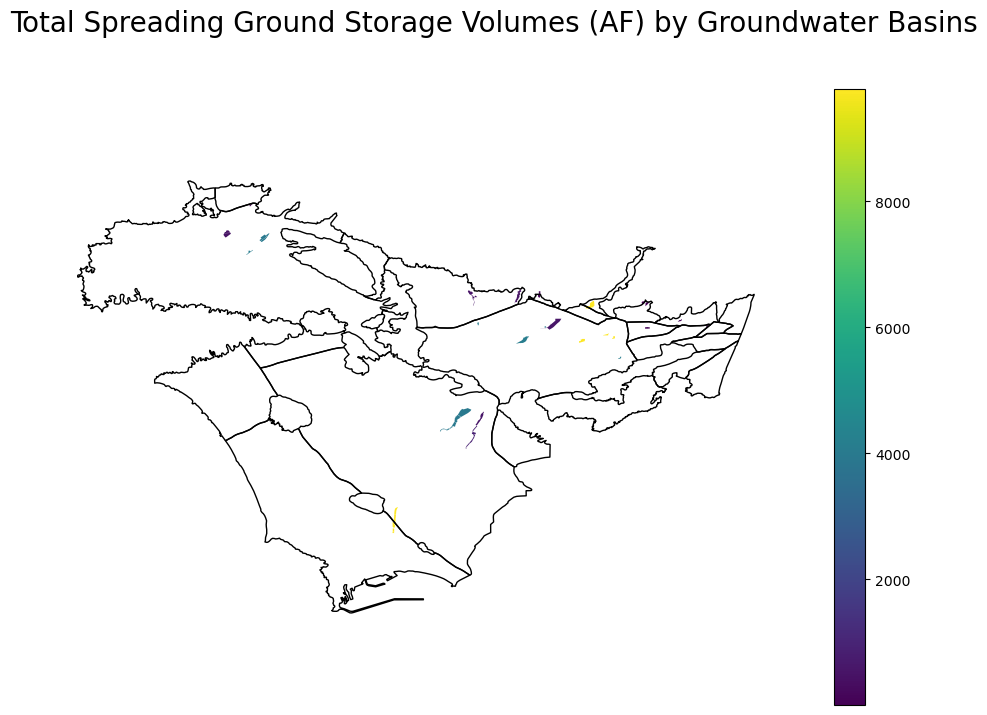

In [71]:
fig, (ax1) = plt.subplots(figsize=(12, 8))

gw_data.plot(alpha=1,facecolor="none",edgecolor="black",zorder=10,ax=ax1)
infil_storage_dissolved.reset_index().plot(column='STORAGE', legend=True, ax=ax1)

plt.suptitle('Total Spreading Ground Storage Volumes (AF) by Groundwater Basins', fontsize=20)
leg = ax1.get_legend()
ax1.set_axis_off()
plt.axis('equal')
plt.show()

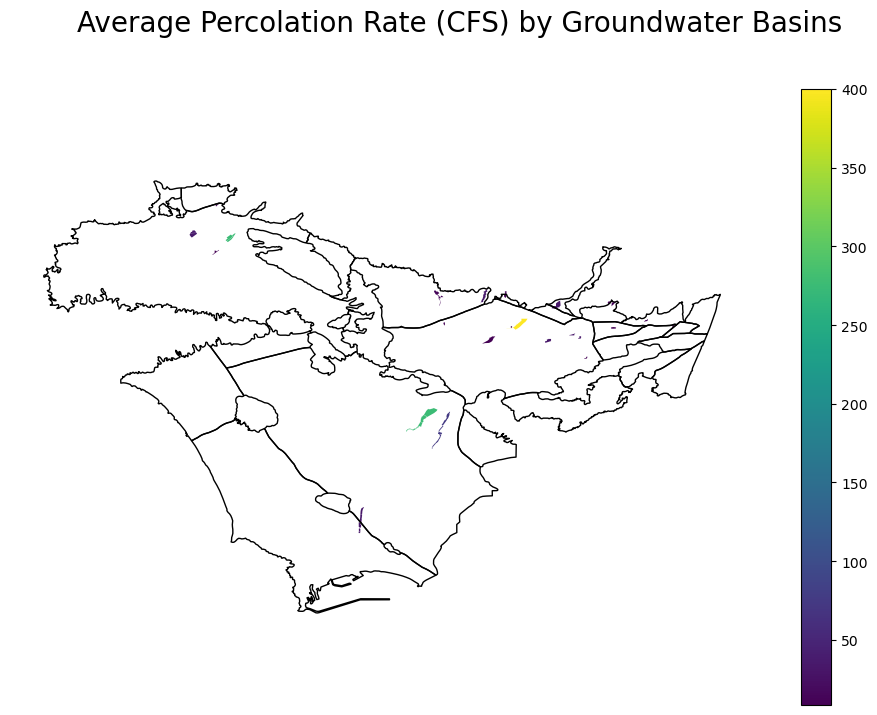

In [72]:
fig, (ax1) = plt.subplots(figsize=(12, 8))

gw_data.plot(alpha=1,facecolor="none",edgecolor="black",zorder=10,ax=ax1)
infil_perc_dissolved.reset_index().plot(column='PERCOLATIO', legend=True, ax=ax1)

plt.suptitle('Average Percolation Rate (CFS) by Groundwater Basins', fontsize=20)
leg = ax1.get_legend()
ax1.set_axis_off()
plt.axis('equal')
plt.show()

In [73]:
stats_df = infil_storage_dissolved.copy

In [77]:
stats_df = gpd.sjoin(infil_perc_dissolved,infil_storage_dissolved)

In [82]:
stats_df = stats_df.drop(columns=['index_right'])

,geometry,PERCOLATIO,STORAGE
NO__OF_BAS,,,
1,"MULTIPOLYGON (((-117.87466 34.07516, -117.8746...",9.4,4115
2,"MULTIPOLYGON (((-118.20666 33.82022, -118.2066...",33.8,9786
3,"POLYGON ((-118.08531 33.97695, -118.08369 33.9...",75.0,550
4,"MULTIPOLYGON (((-117.83765 34.11948, -117.8376...",8.5,100
5,"MULTIPOLYGON (((-117.74684 34.11953, -117.7468...",13.0,12
6,"MULTIPOLYGON (((-118.41162 34.30018, -118.4115...",15.0,24
7,"MULTIPOLYGON (((-118.09976 33.94354, -118.0997...",75.0,913
9,"POLYGON ((-117.83749 34.15145, -117.83749 34.1...",12.0,12
12,"MULTIPOLYGON (((-118.01942 34.17175, -118.0197...",35.0,465
